<h2> Compresia de imagini folosind descompunerea in valori singulara </h2>

[[[0.64705884 0.6431373  0.80784315]
  [0.64705884 0.6431373  0.8156863 ]
  [0.64705884 0.6509804  0.8352941 ]
  ...
  [0.627451   0.63529414 0.7176471 ]
  [0.627451   0.63529414 0.7176471 ]
  [0.627451   0.63529414 0.7176471 ]]

 [[0.64705884 0.6431373  0.80784315]
  [0.64705884 0.6431373  0.8156863 ]
  [0.64705884 0.6509804  0.8352941 ]
  ...
  [0.627451   0.63529414 0.7176471 ]
  [0.627451   0.63529414 0.7176471 ]
  [0.627451   0.63529414 0.7176471 ]]

 [[0.64705884 0.6431373  0.80784315]
  [0.64705884 0.6431373  0.8156863 ]
  [0.64705884 0.6509804  0.8352941 ]
  ...
  [0.627451   0.63529414 0.7176471 ]
  [0.627451   0.63529414 0.7176471 ]
  [0.627451   0.63529414 0.7176471 ]]

 ...

 [[0.67058825 0.6666667  0.7372549 ]
  [0.67058825 0.6627451  0.7490196 ]
  [0.6784314  0.67058825 0.7647059 ]
  ...
  [0.6313726  0.6431373  0.7019608 ]
  [0.6313726  0.6431373  0.7019608 ]
  [0.6313726  0.6431373  0.7019608 ]]

 [[0.6666667  0.6627451  0.7372549 ]
  [0.6666667  0.65882355 0.74509805]


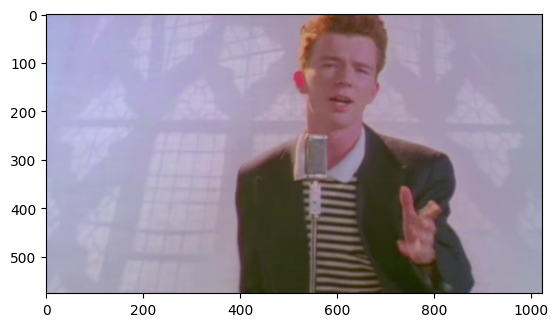

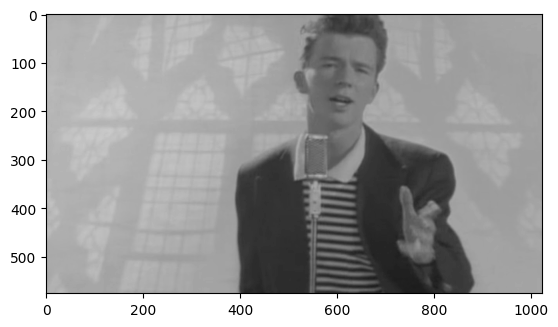

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Functie de conversie din RGB in GRAY
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

        
#Cititi o imagine rgb la alagere (Atentie schimbati nume_imagine cu numele imaginei alese)
Img =  mpimg.imread('imagine.png') # remarca: matplotlib accepta doar imagini .png
fig1 =plt.figure(1)
plt.imshow(Img)
print(Img)
fig2 =plt.figure(2)
grayImg = rgb2gray(Img)
plt.imshow(grayImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

plt.show()
#1024x576

Cerinta 1: Aplicati svd pe imaginea gray utilizand functian <b>np.linalg.svd</b>

In [57]:
U,sigma,Vt=np.linalg.svd(grayImg,full_matrices=False)
print(sigma)

[4.42740512e+02 7.28323330e+01 2.25984694e+01 1.99118700e+01
 1.55744149e+01 1.45111817e+01 1.15203338e+01 9.98536587e+00
 8.80098065e+00 7.61855863e+00 7.29066530e+00 6.92785549e+00
 5.69158855e+00 4.86879548e+00 4.33072244e+00 4.06536612e+00
 3.77695162e+00 3.66888569e+00 3.55493528e+00 3.18866481e+00
 2.94685246e+00 2.88653404e+00 2.62658762e+00 2.53742241e+00
 2.39666072e+00 2.30278510e+00 2.24854872e+00 2.08708623e+00
 1.94473464e+00 1.87592883e+00 1.83247001e+00 1.73233822e+00
 1.71336694e+00 1.65541472e+00 1.61489836e+00 1.57160106e+00
 1.43452969e+00 1.39552556e+00 1.34757206e+00 1.28634815e+00
 1.22122948e+00 1.20640218e+00 1.13034471e+00 1.08723190e+00
 1.06297993e+00 1.03791656e+00 9.88518901e-01 9.60590044e-01
 9.52385965e-01 9.16924667e-01 8.84056297e-01 8.52200788e-01
 8.09944597e-01 8.01400833e-01 7.85672515e-01 7.53605293e-01
 7.17159223e-01 6.99400341e-01 6.88446856e-01 6.69875633e-01
 6.43804896e-01 6.30009800e-01 5.94421516e-01 5.76915068e-01
 5.55567503e-01 5.433189

Cerinta 2: Plotati valorile singulare obtinute la cerinta anterioara pe scala logaritmica utilizand <b>plt.semilogy</b>

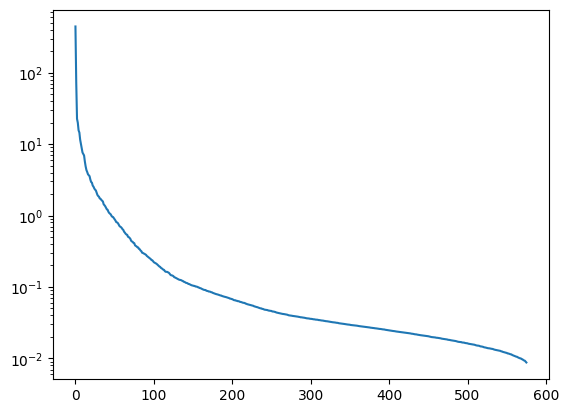

In [53]:
plt.semilogy(sigma)

Cerinta 3: Plotati graficul procent informatie vs valori singulare
(Hint: utilizati functia <b>np.cumsum</b>)

Text(0, 0.5, 'Procent informatie')

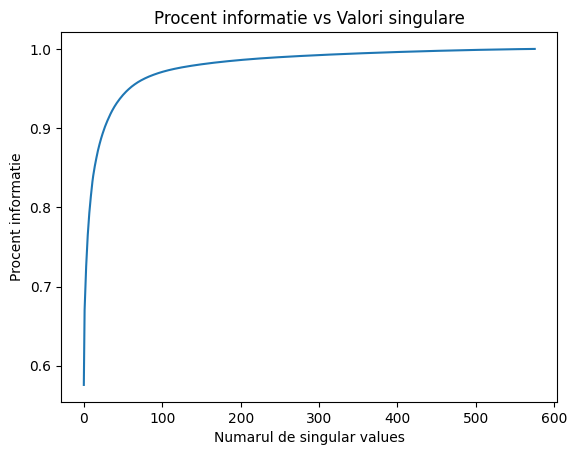

In [26]:
procent = np.cumsum(sigma) / np.sum(sigma)
plt.figure(4)
plt.plot(procent)
plt.xlabel('Numarul de singular values')
plt.ylabel('Procent informatie')

Cerinta 4: In urma analizei graficului procent informatie vs valori singulare generati
un vector de dimensiune minim 

In [18]:
threshold = 0.90
num_components = np.argmax(procent > threshold) + 1  # Numărul minim de componente care retin 90% din informație
print(num_components)


28


5. Utilizati elementele vectorului pentru a reconstrui imaginile.

Text(0.5, 1.0, 'Reconstructie utilizand 28 valori singulare')

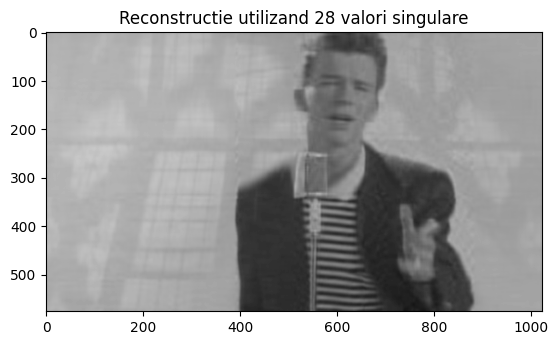

In [34]:
compressed_grayImg = np.dot(U[:, :num_components], np.dot(np.diag(sigma[:num_components]), Vt[:num_components, :]))
plt.figure(5)
plt.imshow(compressed_grayImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.title(f'Reconstructie utilizand {num_components} valori singulare')

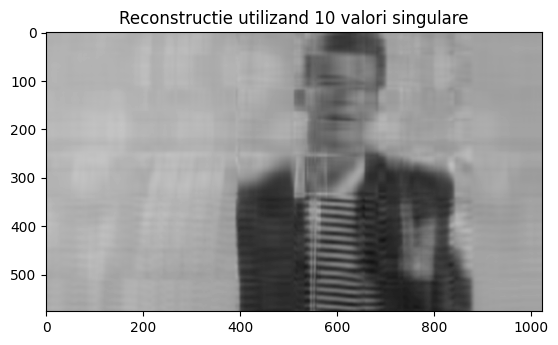

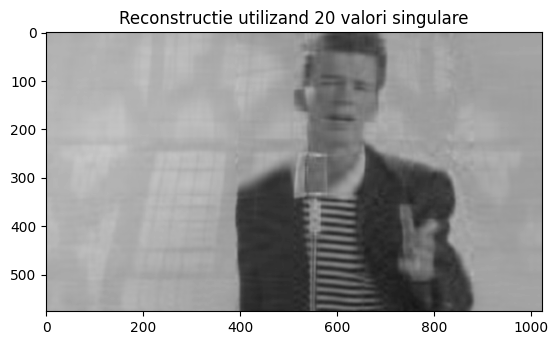

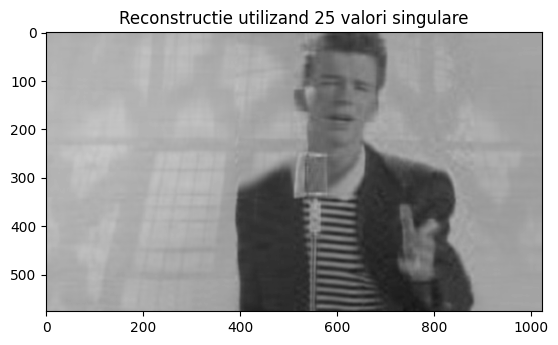

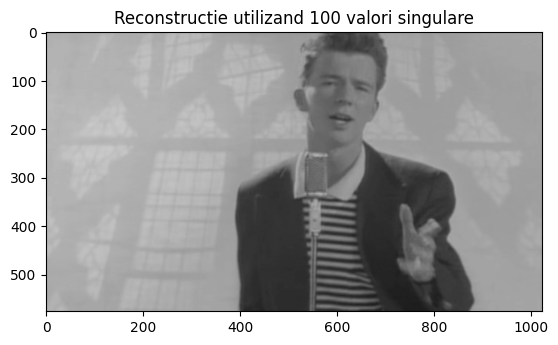

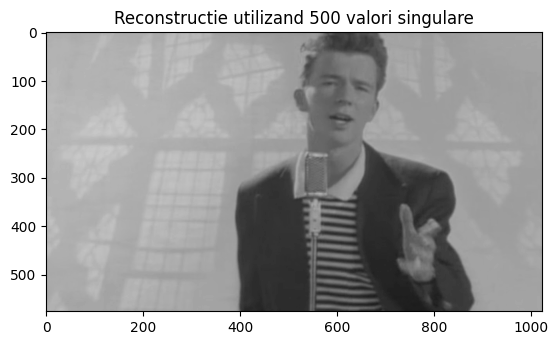

In [42]:
nr=[10, 20, 25 ,100, 500]
k=5
for i in nr:
    compressed_grayImg = np.dot(U[:, :i], np.dot(np.diag(sigma[:i]), Vt[:i, :]))
    plt.figure(k)
    k+=1
    plt.imshow(compressed_grayImg, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.title(f'Reconstructie utilizand {i} valori singulare')